In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

import seaborn as sns
import os 
%matplotlib inline
sns.set_style('whitegrid')

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import LinearSVC

from sklearn.decomposition import PCA

In [2]:
labels = pd.read_csv('data_ECT/labels.csv')

data_path = 'data_ECT/32dirs_48thresh/'


In [3]:
labels.head()

,Unnamed: 0,plant,species,ontogeny,total,heteroblasty
0,0,Pact1,actinia,1,17,17
1,1,Pact1,actinia,2,17,16
2,2,Pact1,actinia,3,17,15
3,3,Pact1,actinia,4,17,14
4,4,Pact1,actinia,5,17,13


In [4]:
labels.species

0       actinia
1       actinia
2       actinia
3       actinia
4       actinia
         ...   
3314    villosa
3315    villosa
3316    villosa
3317    villosa
3318    villosa
Name: species, Length: 3319, dtype: object

In [5]:
col_names = ['t'+str(i) for i in range(32*48)]

In [66]:
df = pd.DataFrame(columns=col_names)
df.head()

,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,...,t1526,t1527,t1528,t1529,t1530,t1531,t1532,t1533,t1534,t1535


In [67]:
#load all ECT images and vectorize them, and add as row to dataframe
for index in range(len(labels)):
    filename = 'leaf_'+str(index)+'.png'
    img_path = os.path.join(data_path,filename)
    image = Image.open(img_path)
    ect = np.array(image, dtype='int').flatten(order='F')
    df.loc[len(df)] = list(ect)

In [69]:
df.describe()

,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,...,t1526,t1527,t1528,t1529,t1530,t1531,t1532,t1533,t1534,t1535
count,3319.000000,3319.000000,3319.000000,3319.000000,3319.000000,3319.000000,3319.000000,3319.000000,3319.000000,3319.000000,...,3319.000000,3319.000000,3319.000000,3319.000000,3319.000000,3319.000000,3319.000000,3319.000000,3319.000000,3319.0
mean,208.352817,209.427840,210.613136,211.981018,213.552275,215.688460,217.338054,218.731546,220.202471,221.664357,...,48.870142,40.877674,33.545345,26.005122,19.560410,11.684845,6.637240,3.912022,0.601085,0.0
std,14.023637,14.742929,15.063551,15.582209,15.571692,14.270105,13.080300,12.414989,12.800716,13.506256,...,33.395745,33.548901,32.935563,31.740428,29.886402,25.244568,20.118869,15.932406,6.404062,0.0
min,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,182.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,191.000000,191.000000,191.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,212.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,208.000000,208.000000,208.000000,208.000000,208.000000,212.000000,212.000000,212.000000,212.000000,229.000000,...,63.000000,58.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,208.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,231.000000,231.000000,...,69.000000,69.000000,63.000000,63.000000,63.000000,0.000000,0.000000,0.000000,0.000000,0.0
max,229.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,106.000000,106.000000,102.000000,102.000000,92.000000,85.000000,76.000000,76.000000,69.000000,0.0


In [71]:
#Add target column
df['target'] = labels.species

In [72]:
X = df.drop('target', axis=1)
y = df.target

print(f"'X' shape: {X.shape}")
print(f"'y' shape: {y.shape}")

pipeline = Pipeline([
    ('min_max_scaler', MinMaxScaler()),
    ('std_scaler', StandardScaler())
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

'X' shape: (3319, 1536)
'y' shape: (3319,)


In [73]:
X_train

,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,...,t1526,t1527,t1528,t1529,t1530,t1531,t1532,t1533,t1534,t1535
2132,191,191,191,191,212,212,212,212,212,212,...,85,63,63,63,63,0,0,0,0,0
2575,208,208,208,208,208,208,208,231,231,231,...,46,46,46,46,23,0,0,0,0,0
1972,191,191,212,212,212,212,212,212,212,212,...,63,63,63,63,63,63,63,0,0,0
456,208,208,208,208,208,208,208,231,231,231,...,0,0,0,0,0,0,0,0,0,0
462,208,208,208,208,208,208,208,231,231,231,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,229,229,229,229,229,229,229,229,229,229,...,51,25,0,0,0,0,0,0,0,0
1130,229,229,229,229,229,229,229,229,229,229,...,0,0,0,0,0,0,0,0,0,0
1294,191,191,191,191,191,191,212,212,212,212,...,63,63,63,63,63,0,0,0,0,0
860,191,191,191,191,191,212,212,212,212,212,...,63,63,63,63,63,0,0,0,0,0


In [76]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")
        plt.figure(figsize=(20,10)) 
        sns.heatmap(confusion_matrix(y_test, pred, normalize='true'), cmap="Blues",annot=True) 

/Users/sarahmcguire/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Train Result:
Accuracy Score: 98.19%
_______________________________________________
CLASSIFICATION REPORT:
             actinia      alata  amethystina  biflora   caerulea  capsularis  \
precision   0.984375   0.984127          1.0      1.0   0.976190         1.0   
recall      0.984375   1.000000          1.0      1.0   1.000000         1.0   
f1-score    0.984375   0.992000          1.0      1.0   0.987952         1.0   
support    64.000000  62.000000         46.0     43.0  41.000000        50.0   

           cincinnata  coccinea  coriacea  cristalina  ...  setacea  \
precision         1.0       1.0       1.0         1.0  ...      1.0   
recall            1.0       1.0       1.0         1.0  ...      1.0   
f1-score          1.0       1.0       1.0         1.0  ...      1.0   
support          20.0      60.0      95.0        68.0  ...     63.0   

           sidifolia  suberosa  tenuifila  tricuspis    triloba  villosa  \
precision   0.947917       1.0        1.0        1.0   0.98

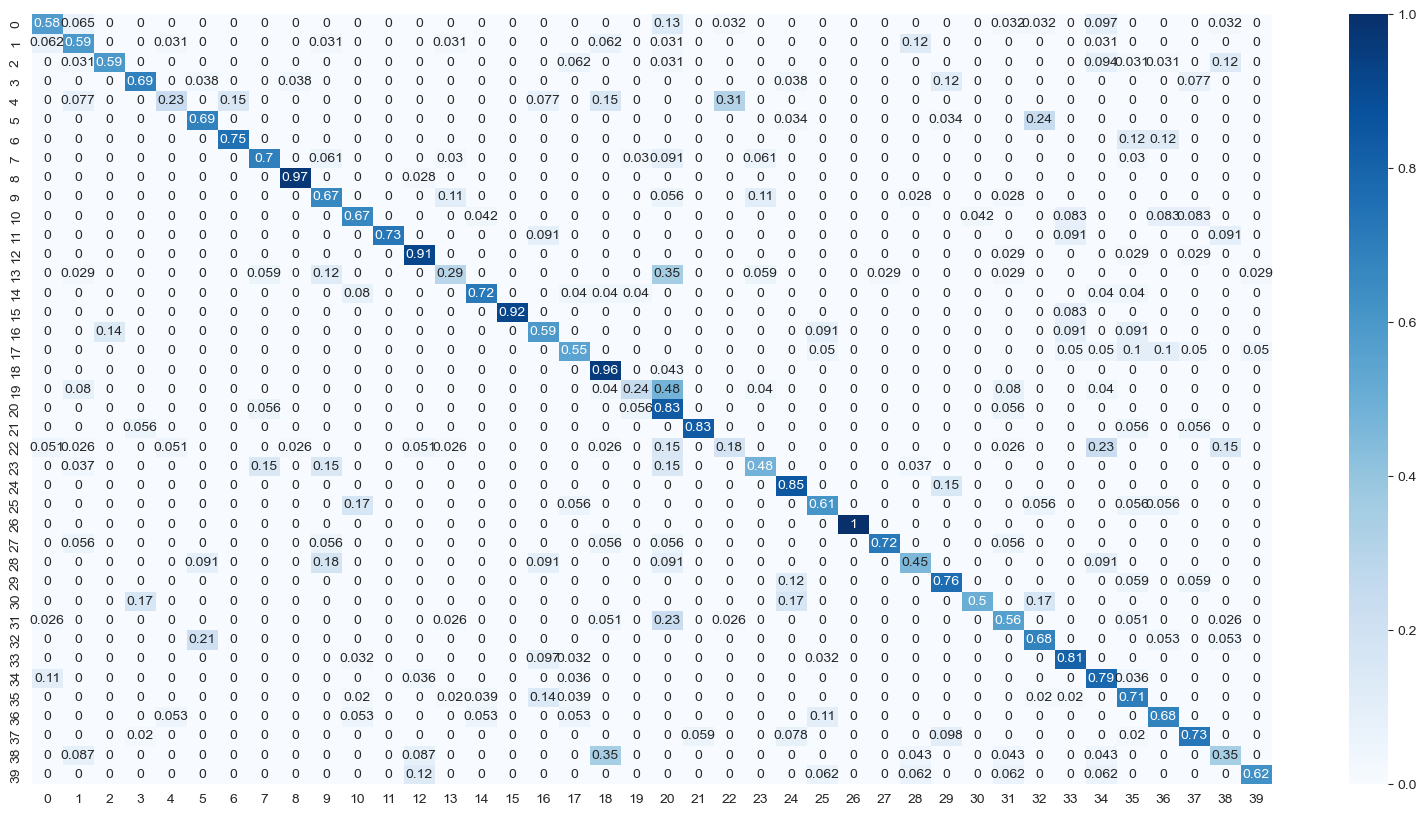

In [77]:
#model = LinearSVC(loss='hinge', dual=True)
model = LinearSVC()
model.fit(X_train, y_train)

print_score(model, X_train, y_train, X_test, y_test, train=True)
print_score(model, X_train, y_train, X_test, y_test, train=False)

# Now use PCA first

In [78]:
#scale data so each feature has single unit variance
scaler = StandardScaler()

In [79]:
pca = PCA(n_components=1536)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

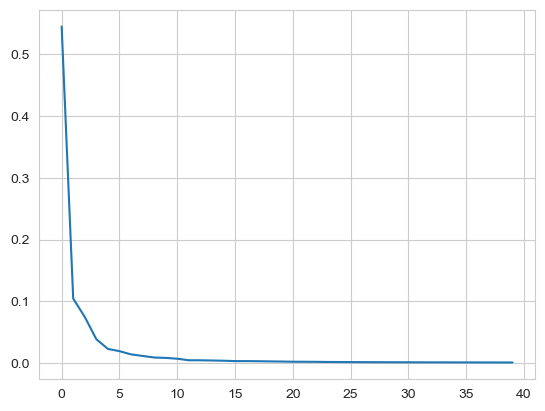

In [80]:
plt.plot(pca.explained_variance_ratio_[0:40])

In [81]:
pca.explained_variance_ratio_[0:40]

array([0.54539944, 0.10447337, 0.07476449, 0.03867356, 0.02296071,
       0.01929446, 0.01409811, 0.01154088, 0.00901132, 0.0083745 ,
       0.00706603, 0.00455398, 0.00450517, 0.00417039, 0.00379589,
       0.00320062, 0.00317581, 0.00300984, 0.00271172, 0.00247743,
       0.00215592, 0.00210401, 0.00199263, 0.00178257, 0.00170813,
       0.0015775 , 0.0015037 , 0.00140232, 0.0013565 , 0.0013035 ,
       0.00128189, 0.00118665, 0.00114526, 0.00113598, 0.00111744,
       0.00106399, 0.00104136, 0.00101043, 0.00097593, 0.00095768])

In [82]:
data = {'PC1': X_train[:,0],
        'PC2': X_train[:,1],
        'PC3': X_train[:,2],
        'Target': y_train}
 
# Convert the dictionary into DataFrame
PCAdf = pd.DataFrame(data)

In [83]:
PCAdf

,PC1,PC2,PC3,Target
2132,0.981564,-0.836908,-0.773464,mollissima
2575,0.028458,0.800421,-0.415252,rubra
1972,1.712136,-0.625649,1.733428,misera
456,0.228713,0.893643,-0.309817,capsularis
462,0.482265,0.923950,-0.319742,capsularis
...,...,...,...,...
1095,-0.126989,2.276957,-1.216803,galbana
1130,-1.785505,-0.270602,1.644368,galbana
1294,0.119075,-1.339133,-0.834139,hatschbachii
860,0.723028,-0.917427,-0.966371,edmundoi


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

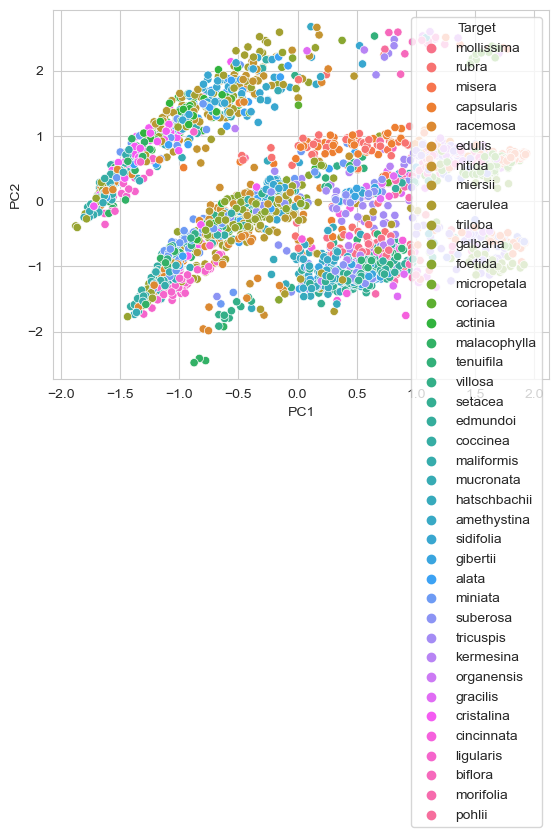

In [84]:
sns.scatterplot(x='PC1', y='PC2', data=PCAdf, hue='Target', ec=None)

<AxesSubplot:xlabel='PC2', ylabel='PC3'>

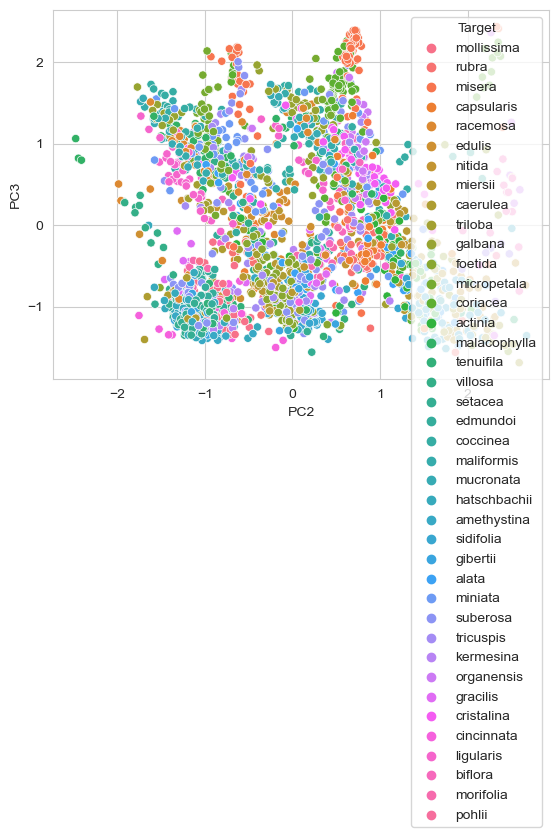

In [85]:
sns.scatterplot(x='PC2', y='PC3', data=PCAdf, hue='Target', ec=None)

<AxesSubplot:xlabel='PC1', ylabel='PC3'>

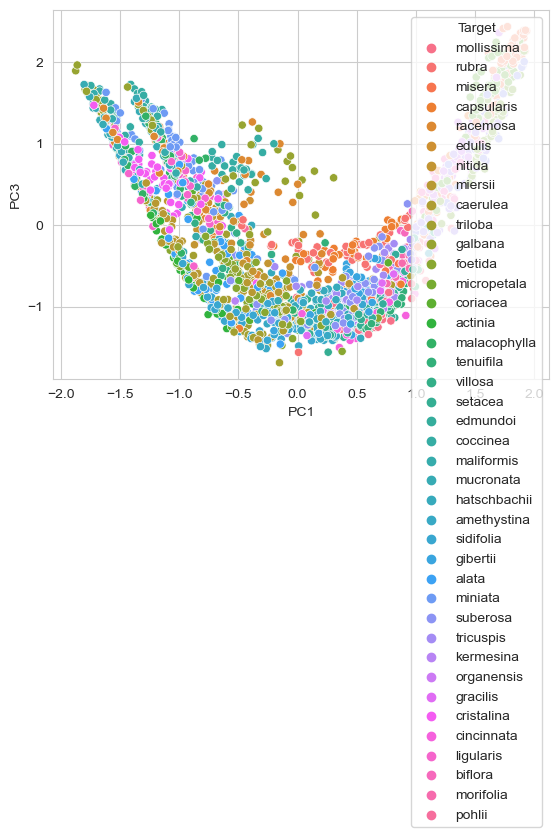

In [86]:
sns.scatterplot(x='PC1', y='PC3', data=PCAdf, hue='Target', ec=None)

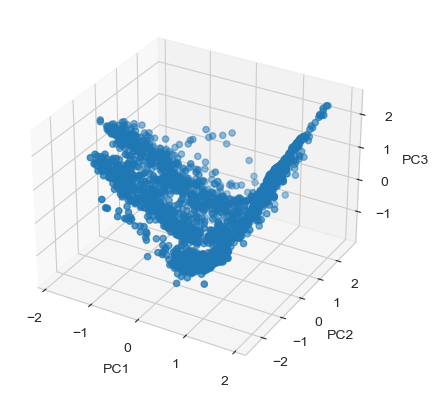

In [87]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = PCAdf['PC1']
y = PCAdf['PC2']
z = PCAdf['PC3']

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

ax.scatter(x, y, z)

plt.show()

/Users/sarahmcguire/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
           actinia  alata  amethystina  biflora  caerulea  capsularis  \
precision      1.0    1.0          1.0      1.0       1.0         1.0   
recall         1.0    1.0          1.0      1.0       1.0         1.0   
f1-score       1.0    1.0          1.0      1.0       1.0         1.0   
support       64.0   62.0         46.0     43.0      41.0        50.0   

           cincinnata  coccinea  coriacea  cristalina  ...  setacea  \
precision         1.0       1.0       1.0         1.0  ...      1.0   
recall            1.0       1.0       1.0         1.0  ...      1.0   
f1-score          1.0       1.0       1.0         1.0  ...      1.0   
support          20.0      60.0      95.0        68.0  ...     63.0   

           sidifolia  suberosa  tenuifila  tricuspis  triloba  villosa  \
precision        1.0       1.0        1.0        1.0      1.0      1.0   
recall           1.0 

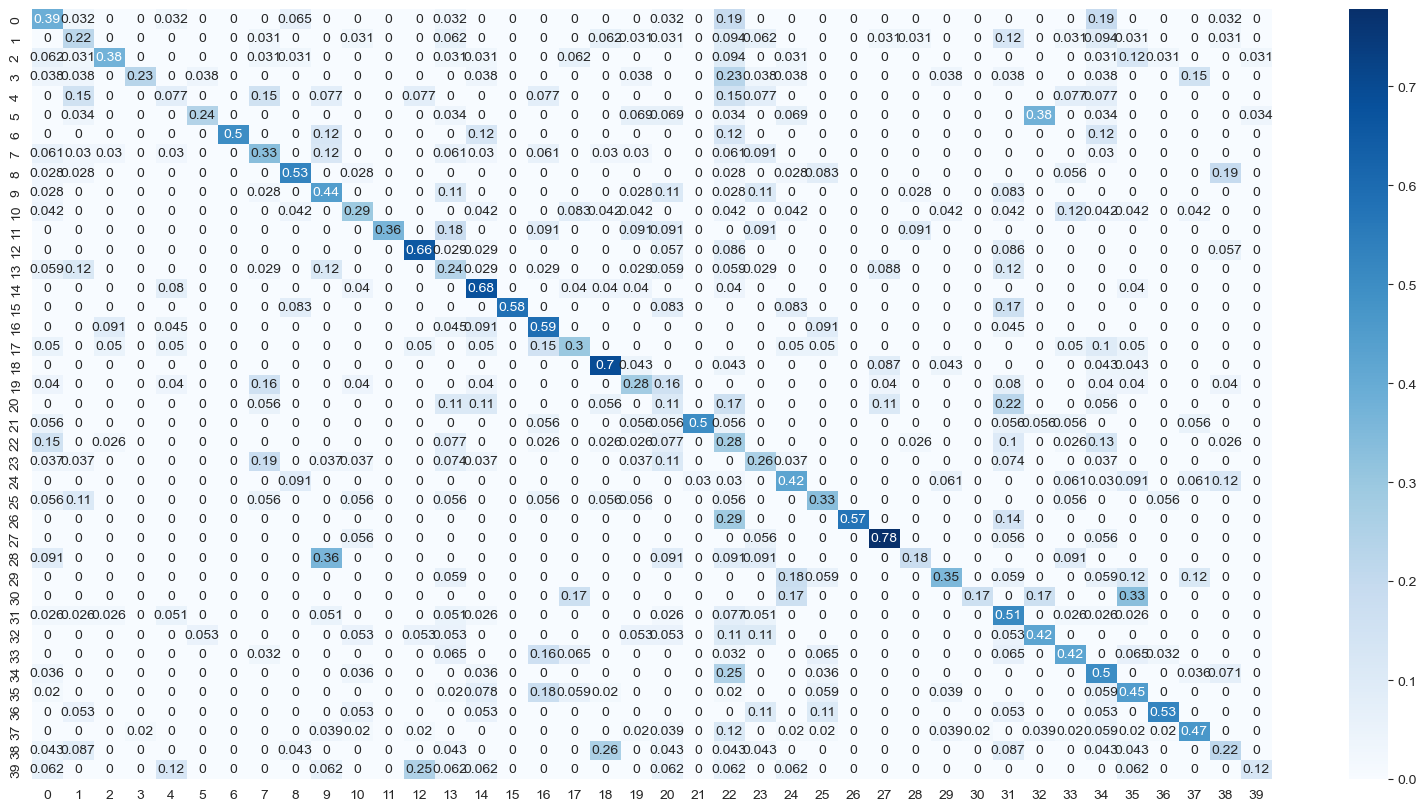

In [89]:
model = LinearSVC()
model.fit(X_train, y_train)

print_score(model, X_train, y_train, X_test, y_test, train=True)
print_score(model, X_train, y_train, X_test, y_test, train=False)

## Intra- and Inter- class variance ratio

In [90]:
df.drop('target',axis=1)

,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,...,t1526,t1527,t1528,t1529,t1530,t1531,t1532,t1533,t1534,t1535
0,229,229,229,229,229,229,229,229,229,229,...,25,0,0,0,0,0,0,0,0,0
1,229,229,229,229,229,229,229,229,229,229,...,0,0,0,0,0,0,0,0,0,0
2,229,229,229,229,229,229,229,229,229,229,...,25,0,0,0,0,0,0,0,0,0
3,208,208,208,208,208,208,208,208,208,208,...,23,0,0,0,0,0,0,0,0,0
4,208,208,208,208,208,208,208,208,208,208,...,69,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3314,208,208,208,208,208,208,208,208,208,208,...,0,0,0,0,0,0,0,0,0,0
3315,208,208,208,208,208,208,208,208,208,208,...,23,0,0,0,0,0,0,0,0,0
3316,191,191,191,191,191,191,191,191,191,191,...,63,21,0,0,0,0,0,0,0,0
3317,208,208,208,208,208,208,208,208,208,231,...,69,23,0,0,0,0,0,0,0,0


In [91]:
X.mean(axis=1)

0       168.569010
1       170.779297
2       169.799479
3       154.608724
4       153.123698
           ...    
3314    153.522135
3315    152.264974
3316    140.792969
3317    151.386068
3318    152.919271
Length: 3319, dtype: float64

In [92]:
X.var(axis=1)

0       8693.530088
1       8604.430086
2       8652.295922
3       7077.216836
4       7212.817262
           ...     
3314    7374.007327
3315    7394.873717
3316    6158.153853
3317    7292.480822
3318    7203.181752
Length: 3319, dtype: float64

In [93]:
X.var(axis=0)

t0       196.662402
t1       217.353969
t2       226.910569
t3       242.805245
t4       242.477601
            ...    
t1531    637.288230
t1532    404.768908
t1533    253.841564
t1534     41.012006
t1535      0.000000
Length: 1536, dtype: float64

In [94]:
max(X.iloc[[0]])

't999'

In [95]:
print(X.iloc[[0]])

    t0   t1   t2   t3   t4   t5   t6   t7   t8   t9  ...  t1526  t1527  t1528  \
0  229  229  229  229  229  229  229  229  229  229  ...     25      0      0   

   t1529  t1530  t1531  t1532  t1533  t1534  t1535  
0      0      0      0      0      0      0      0  

[1 rows x 1536 columns]


In [96]:
# Convert the dictionary into DataFrame
intra_class_df = pd.DataFrame(columns=['species','mean','std'])

In [97]:
# data frame of 1 class and compute its standard deviation
# Mean and std of pixel value within a class
for species in df.target.unique():
    
    mean = df[df['target'] == species].drop('target',axis=1).values.mean()
    std = df[df['target'] == species].drop('target',axis=1).stack().std()
    intra_class_df.loc[len(intra_class_df)] = [species, mean, std]


In [98]:
intra_class_df

,species,mean,std
0,actinia,166.749794,91.375628
1,alata,161.652351,90.848334
2,amethystina,150.476529,83.409899
3,biflora,155.522249,87.356265
4,caerulea,151.334153,85.845716
5,capsularis,156.389941,83.131960
6,cincinnata,144.976725,78.021924
7,coccinea,157.769104,89.396887
8,coriacea,150.147468,88.036940
9,cristalina,163.957413,92.910488


In [99]:
intra_class_df.describe()

,mean,std
count,40.000000,40.000000
mean,152.728584,85.654007
std,7.465247,4.089375
min,137.227319,78.021924
25%,145.618231,82.483677
50%,152.966741,85.517797
75%,158.069939,88.943737
max,166.749794,92.910488


In [110]:
dataset_variance = np.array(df.std()).reshape([48,32],order='F')

/var/folders/j1/837t9x6s48l8_l8tzvqv94mw0000gn/T/ipykernel_62299/1932098286.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset_variance = np.array(df.std()).reshape([48,32],order='F')


In [104]:
actinia_variance= np.array(df[df['target'] == 'actinia'].drop('target',axis=1).std()).reshape([48,32],order='F')

<AxesSubplot:>

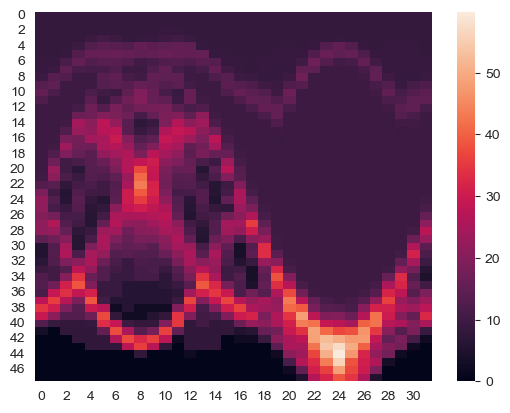

In [111]:
sns.heatmap(actinia_variance)

<AxesSubplot:>

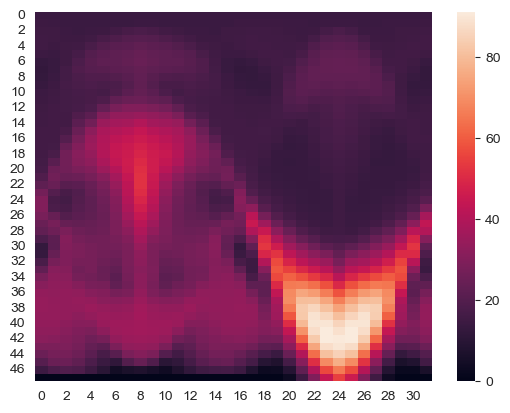

In [112]:
sns.heatmap(dataset_variance)

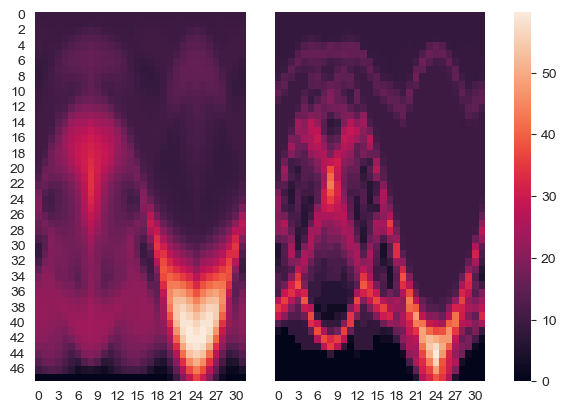

In [128]:
f,(ax1,ax2, axcb) = plt.subplots(1,3, gridspec_kw={'width_ratios':[1,1,0.08]})
ax1.get_shared_y_axes().join(ax1,ax2)
g1 = sns.heatmap(dataset_variance,cbar=False,ax=ax1)
g1.set_ylabel('')
g1.set_xlabel('')
g2 = sns.heatmap(actinia_variance,ax=ax2,cbar_ax=axcb)
g2.set_ylabel('')
g2.set_xlabel('')
g2.set_yticks([])


plt.show()